In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import rescomp

import matplotlib.pyplot as plt
import os

# new imports:
from rescomp.alternative_tests import simulation_tests as simt

# Conduct experiment:
- compare divergence
- compare Largest LE qr
- compare divergence trajectory of qr algorithm

## Parameters used for divergence and LLE qr:

In [2]:
prepath = "C:/Users\Dennis\Documents\FILES&INFO\WISSEN\STUDIUM\Master LMU\Masterthesis\LyapunovExponentsSimulations"
exp_name_both = "KS_31_01_2022"

In [3]:
# define all the simulations we want to test:

def create_ks_sim_func(mode, dimensions, system_size, *args):
    if mode == "precision":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_custom(dimensions, system_size, dt, time_steps, 
                                                                    starting_point,
                                     precision=args[1], fft_type=args[0])
    elif mode == "Bhatt":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_Bhatt(dimensions, system_size, dt, time_steps, 
                                                                   starting_point)
    elif mode == "normal":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point)
    elif mode == "normal_M":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky(dimensions, system_size, dt, time_steps, starting_point, 
                                                             M=args[0])
    elif mode == "Pathak":
        from rescomp.alternative_sims.pvlachas.Utils import KS
        def data_creation_function(time_steps, dt, starting_point=None):
            L = system_size / (2 * np.pi)
            dns = KS.KS(L=L, N=dimensions, dt=dt, nsteps=time_steps)
            dns.IC(u0=starting_point)
            # simulate initial transient
            dns.simulate()
            # convert to physical space
            dns.fou2real()
            return dns.return_sim_data()
    elif mode == "rkstiff":
        def data_creation_function(time_steps, dt, starting_point=None):
            return rescomp.simulations._kuramoto_sivashinsky_rkstiff(dimensions, system_size, dt, time_steps, 
                                                                   starting_point, IF_eps=args[0])
    return data_creation_function

# Create different KS Sim functions:
def create_ks_sim_dict(dimensions, system_size):
    ks_sim_dict = {
                   "scipy32": create_ks_sim_func("precision", dimensions, system_size, "scipy", 32), 
                   "scipy64": create_ks_sim_func("precision", dimensions, system_size, "scipy", 64), 
                   "scipy": create_ks_sim_func("precision", dimensions, system_size, "scipy", None),
                   "numpy32": create_ks_sim_func("precision", dimensions, system_size, "numpy", 32),
                   "numpy64": create_ks_sim_func("precision", dimensions, system_size, "numpy", 64),
                   "numpy": create_ks_sim_func("precision", dimensions, system_size, "numpy", None),
                   "Bhatt": create_ks_sim_func("Bhatt", dimensions, system_size),
                   "normal": create_ks_sim_func("normal", dimensions, system_size),
                   "normalM1": create_ks_sim_func("normal", dimensions, system_size, 16),
                   "normalM2": create_ks_sim_func("normal", dimensions, system_size, 200),
                   "Pathak": create_ks_sim_func("Pathak", dimensions, system_size),
                   "rkstiff": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-4), 
                   "rkstiffE1": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-1), 
                   "rkstiffE2": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-2), 
                   "rkstiffE3": create_ks_sim_func("rkstiff", dimensions, system_size, 1e-7), 
    }
    return ks_sim_dict

In [4]:
# create the "create_sim_func" func:
def create_sim_func(parameters):
    dims = parameters["dims"]
    L = parameters["L"]
    sim = parameters["sim"]
    return create_ks_sim_dict(dimensions=dims, system_size=L)[sim]

# create the "create_sp_func" starting point func:
def create_sp_func(parameters, Nens):
    dims = parameters["dims"]
    seed = parameters["seed"]
    np.random.seed(seed)
    starting_points = np.random.randn(Nens, dims)
    return starting_points

# # create the "create_sp_func" starting point func:
# def create_sp_func(parameters, Nens):
#     dims = parameters["dims"]
#     L = parameters["L"]
#     x = L * np.transpose(np.conj(np.arange(1, dims + 1))) / dims
#     starting_points = np.cos(2 * np.pi * x / L) * (1 + np.sin(2 * np.pi * x / L))
#     return starting_points[np.newaxis, :]

create_sim_func_keys = ["dims", "L", "sim"]
create_sp_func_keys = ["dims", "seed"]

## Exp1: Compare Divergence:

In [5]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "L": 36,
    "dims": [54],
    "sim": ["scipy32", ], # , "Bhatt", "Pathak", "rkstiffE1", "numpy", "numpy32", "numpy64", 
    "seed": 100,
    
    "dt": [0.5],
    "tau": [1000],
    "T": 35, 
    
    "eps":  [1e-6]
}
# define Ndims and Nens
Ndims = 10
Nens = 100

# define saving:
save = True

div_name = "_div_defaultsp_9"
exp_name_div = exp_name_both + div_name

# other parameters:
get_info = True

out_div = simt.compare_simulations_div(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_div, Nens=Nens, Ndims=Ndims
                         , get_info=get_info)

--------------------
create_sim_func_keys ['dims', 'L', 'sim']
create_sp_func_keys ['dims', 'seed']
--------------------
--------------------
PARAMETERS: 
L 36
dims 54
sim scipy32
seed 100
dt 0.5
tau 1000
T 35
eps 1e-06
--------------------
STARTING CALCULATIONS (1): 
....
CALC: 1/1
{'L': 36, 'dims': 54, 'sim': 'scipy32', 'seed': 100}, dt: 0.5, tau: 1000, T: 35, eps: 1e-06
N_ens: 1/100
N_ens: 2/10070
N_ens: 3/10070
N_ens: 4/10070
N_ens: 5/10070
N_ens: 6/10070
N_ens: 7/10070
N_ens: 8/10070
N_ens: 9/10070
N_ens: 10/1000
N_ens: 11/1000
N_ens: 12/1000
N_ens: 13/1000
N_ens: 14/1000
N_ens: 15/1000
N_ens: 16/1000
N_ens: 17/1000
N_ens: 18/1000
N_ens: 19/1000
N_ens: 20/1000
N_ens: 21/1000
N_ens: 22/1000
N_ens: 23/1000
N_ens: 24/1000
N_ens: 25/1000
N_ens: 26/1000
N_ens: 27/1000
N_ens: 28/1000
N_ens: 29/1000
N_ens: 30/1000
N_ens: 31/1000
N_ens: 32/1000
N_ens: 33/1000
N_ens: 34/1000
N_ens: 35/1000
N_ens: 36/1000
N_ens: 37/1000
N_ens: 38/1000
N_ens: 39/1000
N_ens: 40/1000
N_ens: 41/1000
N_ens: 42/1

## Exp2: LLE qr and trajectory divergence:

In [ ]:
# create the parameter dict to define the experiment:
parameter_dict = {
    "L": 36,
    "dims": [54],
    "sim": ["normal", "Bhatt", "Pathak", "rkstiffE1", "numpy", "numpy32", "numpy64", "rkstiff", "scipy32"],
    # "sim": ["normal", "Bhatt", "Pathak", "rkstiffE1", "numpy", "numpy32", "numpy64"],
    "seed": 100,
    
    "dt": [0.5],
    "tau": 100,
    "T": [5, 10, 20, 100], 
    
    "eps": [1e-6], 
    "Nqr": 5,
}

# define Nle and Nens
Nle = 1
Nens = 15

# return trajectory div:
traj_div=True

# define saving:
save = True
qr_name = "_qr3"
exp_name_qr = exp_name_both + qr_name

# other parameters:
get_info = True

out_qr = simt.compare_simulations_leqr(create_sim_func, create_sp_func, create_sim_func_keys, create_sp_func_keys,
                    parameter_dict, save=save, prepath=prepath, exp_name=exp_name_qr, Nens=Nens, Nle=Nle
                    , get_info=get_info, traj_div=True)

# Plotting:

### Plot results div:

In [ ]:
#### if you want to LOAD results:
div_name = "_div3"
exp_name_div = exp_name_both + div_name
#### 

simt.load_info_file(prepath, exp_name_div)

lines: 1, cols: 1, rows: 1
x_steps:  71
T:  35


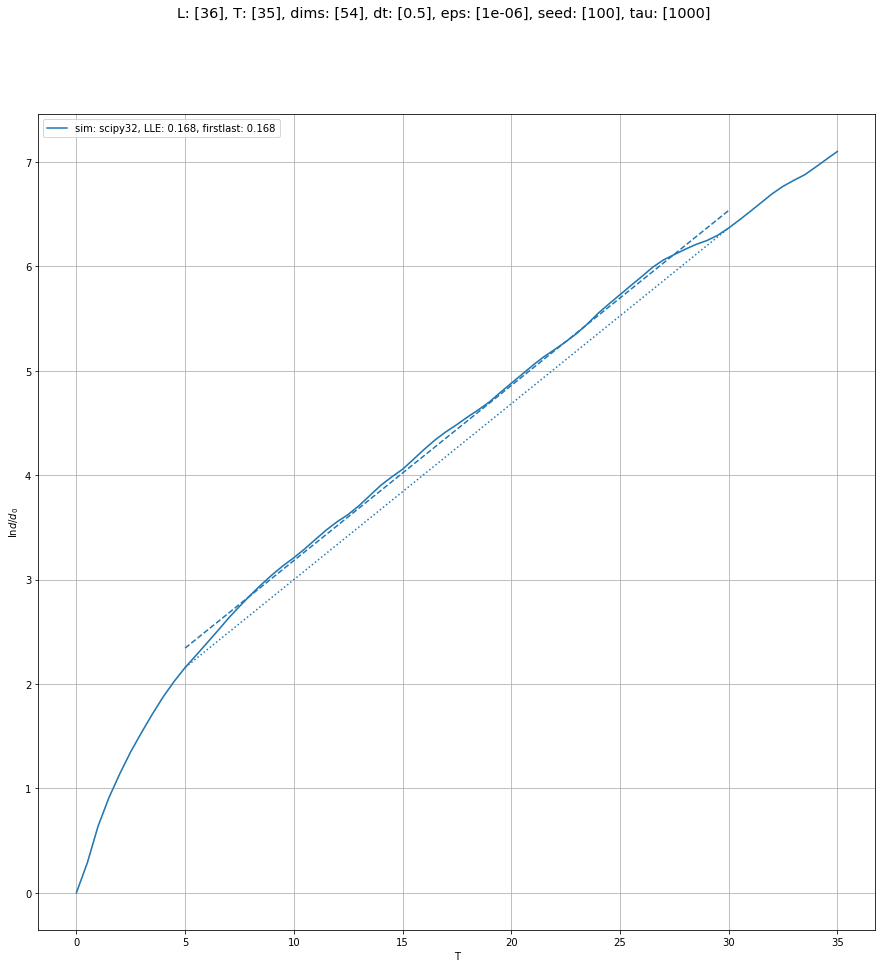

In [6]:
plot_func = simt.plot_div_file

zs = ["sim"]
xs = []
ys = []

# simt.plot_div_file kwargs
mean_axs = "all"
show_error = 0
dim_index = None
ens_index = None

include_fit = 1
t_min = 5
t_max = 30

include_fit_qr = 1
t_min_qr = 5
t_max_qr = 30

subfigsize = (15, 15)
xlims = None # (0,10)
ylims = None # (-1, 10)

simt.plot_experiment(plot_func, prepath, exp_name_div, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, xlims=xlims,
                     ylims=ylims,
                     mean_axs=mean_axs, show_error=show_error,
                 rel_dist=True, include_fit=include_fit, dim_index=dim_index, ens_index=ens_index, 
                t_min=t_min, t_max=t_max, include_fit_qr=include_fit_qr, t_min_qr=t_min_qr, t_max_qr=t_max_qr)

### Plot results qr:

In [ ]:
#### if you want to LOAD results:
qr_name = "_qr3"
exp_name_qr = exp_name_both + qr_name
#### 

simt.load_info_file(prepath, exp_name_qr)

In [ ]:
plot_func = simt.plot_leqr_file

zs = ["sim"]
xs = ["T"]
ys = []

# simt.plot_leqr_file kwargs
mean_axs = "ens"
show_error = True
le_index = None
ens_index = None
every_x_tick = True
subfigsize= (15, 10)

prefix="leqr"

subfigsize = (15, 10)
simt.plot_experiment(plot_func, prepath, exp_name_qr, prefix=prefix, zs=zs, xs=xs, ys=ys, subfigsize=subfigsize, mean_axs=mean_axs, show_error=show_error,
                 le_index=le_index, ens_index=ens_index, every_x_tick=every_x_tick,
                )

### Plot results qr trajectory divergence

In [ ]:
plot_func = simt.plot_qrdiv_file

zs = []
xs = ["T"]
ys = ["sim"]

# simt.plot_leqr_file kwargs
mean_axs = "ens"
show_error = True
le_index = None
ens_index = None

rel_dist=True
include_fit_qr=True

subfigsize = (15, 10)
prefix="qrdiv"
simt.plot_experiment(plot_func, prepath, exp_name_qr, prefix=prefix,  zs=zs, xs=xs, ys=ys,
                     subfigsize=subfigsize, mean_axs=mean_axs, show_error=show_error,
                 le_index=le_index, ens_index=ens_index, rel_dist=rel_dist, include_fit_qr=include_fit_qr
                )